In [77]:
import http.client
import json 
import pandas as pd

conn = http.client.HTTPSConnection("deezerdevs-deezer.p.rapidapi.com")

headers = {
    'x-rapidapi-key': "e29b1dbb3fmsh54bd1c019f56926p130bd6jsn2de4e37cff71",
    'x-rapidapi-host': "deezerdevs-deezer.p.rapidapi.com"
}

conn.request("GET", "https://api.deezer.com/playlist/5704754862", headers=headers)

res = conn.getresponse()
json_data = res.read()

data = json.loads(json_data)
print(data)

# Extraction des informations des pistes
tracks_info = data['tracks']['data']

# Création d'un DataFrame pandas
df_tracks = pd.DataFrame([
    {
        'Track ID': track['id'],
        'Title': track['title'],
        'Duration (s)': track['duration'],
        'Artist': track['artist']['name'],
        'Album': track['album']['title']
    } for track in tracks_info
])

df_tracks.tail()




{'id': 5704754862, 'title': 'Lieblingssongs', 'description': '', 'duration': 478068, 'public': True, 'is_loved_track': True, 'collaborative': False, 'nb_tracks': 1886, 'fans': 1, 'link': 'https://www.deezer.com/playlist/5704754862', 'share': 'https://www.deezer.com/playlist/5704754862?utm_source=deezer&utm_content=playlist-5704754862&utm_term=0_1727373682&utm_medium=web', 'picture': 'https://api.deezer.com/playlist/5704754862/image', 'picture_small': 'https://e-cdns-images.dzcdn.net/images/cover/0bc34ce79169a66ace4b4fd553e13355/56x56-000000-80-0-0.jpg', 'picture_medium': 'https://e-cdns-images.dzcdn.net/images/cover/0bc34ce79169a66ace4b4fd553e13355/250x250-000000-80-0-0.jpg', 'picture_big': 'https://e-cdns-images.dzcdn.net/images/cover/0bc34ce79169a66ace4b4fd553e13355/500x500-000000-80-0-0.jpg', 'picture_xl': 'https://e-cdns-images.dzcdn.net/images/cover/0bc34ce79169a66ace4b4fd553e13355/1000x1000-000000-80-0-0.jpg', 'checksum': 'c6eb538180de54803c1cec981c825f66', 'tracklist': 'https://

In [13]:
def playlistToDataframe(playlist_id):
    import requests
    import json
    import pandas as pd

    all_tracks = []
    limit = 400  # Maximum number of tracks per request
    index = 0    # Starting index for pagination

    while True:
        # Requête avec pagination
        response = requests.get(f"https://api.deezer.com/playlist/{playlist_id}/tracks?limit={limit}&index={index}")
        
        # Vérifier le statut de la réponse
        if response.status_code != 200:
            print(f"Erreur lors de la requête : {response.status_code}")
            break

        # Charger les données JSON
        data = response.json()
        
        # Extraction des informations des pistes
        tracks_info = data['data']
        if not tracks_info:  # Si aucune piste n'est retournée, sortir de la boucle
            break
        
        # Ajouter les pistes à la liste globale
        all_tracks.extend(tracks_info)
        
        # Mettre à jour l'index pour la pagination
        index += limit

    def get_album_genre(album_id):
        album_url = f"https://api.deezer.com/album/{album_id}"
        response = requests.get(album_url)
        if response.status_code == 200:
            album_data = response.json()
            if 'genres' in album_data and album_data['genres']['data']:
                return album_data['genres']['data'][0]['name']  # Retourne le premier genre
        return None  # Retourne None si aucun genre n'est trouvé

    # Création d'un DataFrame pandas avec toutes les pistes
    df_tracks = pd.DataFrame([
        {
            'Track ID': track['id'],
            'Title': track['title'],
            'Artist': track['artist']['name'],
            'Album': track['album']['title'],
            'Genre': get_album_genre(track['album']['id'])  # Appel de la fonction pour obtenir le genre

        } for track in all_tracks
    ])

    # Affichage des derniers morceaux
    df_tracks
    return df_tracks


In [101]:
def showGenresInPlaylist(df_tracks):
    import matplotlib.pyplot as plt

    # Comptage des occurrences de chaque genre
    genre_counts = df_tracks['Genre'].value_counts()

    # Création du graphique avec ajustement de l'écriture et couleurs
    plt.figure(figsize=(12, 8))
    bars = genre_counts.plot(kind='bar', color=plt.cm.Paired(range(len(genre_counts))))

    plt.title('Répartition des différents genres')
    plt.xlabel('Genre')
    plt.ylabel('Nombre de morceaux')
    plt.xticks(rotation=45, ha='right')  # Rotation et alignement des étiquettes
    plt.tight_layout()

    # Ajouter des étiquettes sur les barres
    for bar in bars.patches:
        plt.annotate(format(bar.get_height(), '.0f'), 
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 8), 
                    textcoords='offset points')

    plt.show()

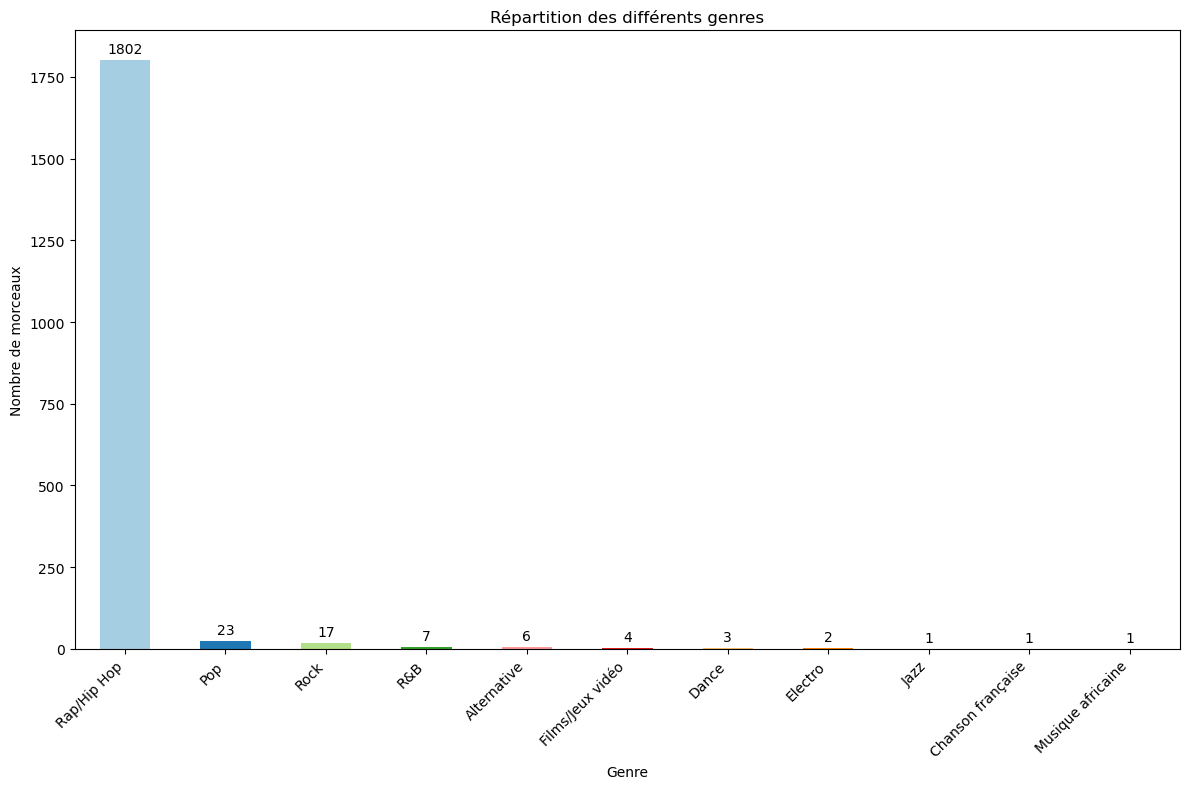

In [103]:
LovedPlaylistGlenn = playlistToDataframe(919463175)
showGenresInPlaylist(LovedPlaylistGlenn)

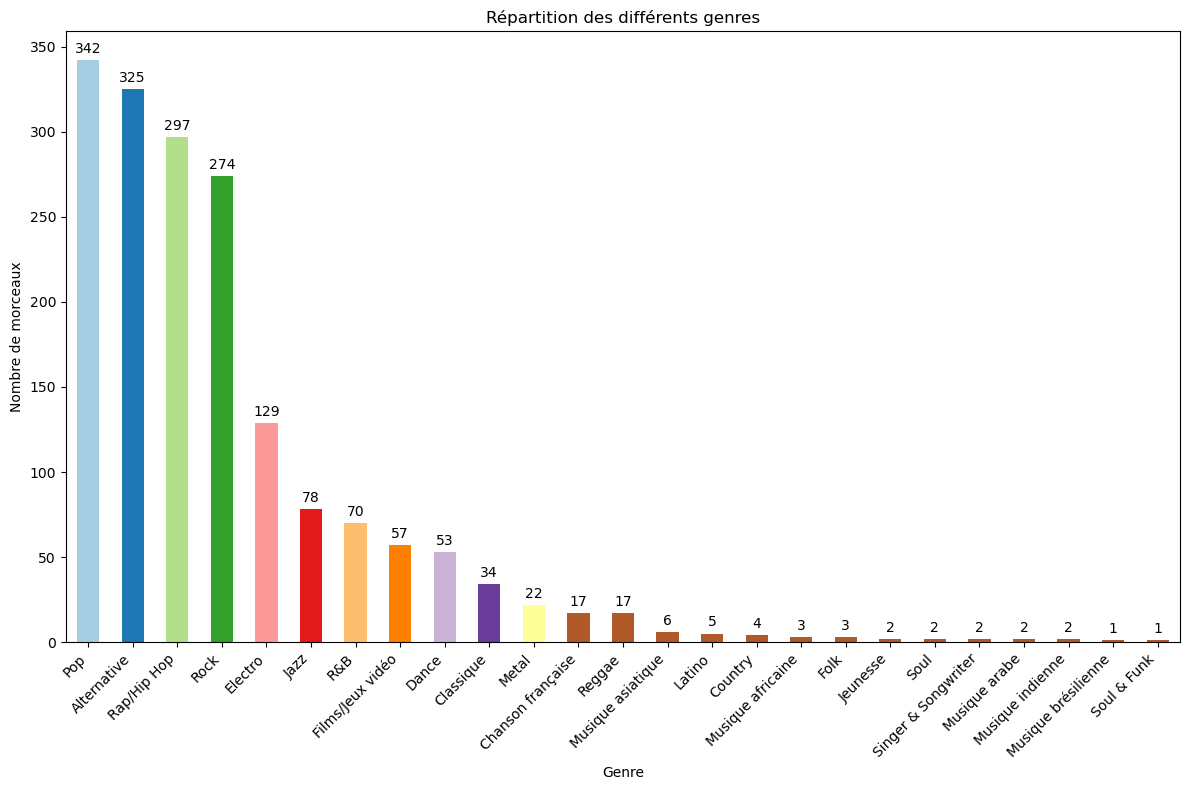

In [104]:
showGenresInPlaylist(df_tracks)

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import pandas as pd
from datetime import datetime, timedelta
import getpass

# Initialisation du driver
driver = webdriver.Chrome()

# Chargement de la page Deezer
driver.get("https://www.deezer.com")

wait = WebDriverWait(driver, 50)

# Accepter les cookies
try:
    accept_cookies_button = wait.until(
        EC.element_to_be_clickable((By.XPATH, '//*[@id="gdpr-btn-accept-all"]'))
    )
    accept_cookies_button.click()
except Exception as e:
    print(f"Erreur lors de l'acceptation des cookies: {e}")

print("Cookies acceptés")

# Ouvrir le menu de connexion
try:
    login_button = wait.until(
        EC.element_to_be_clickable((By.XPATH, '//*[@id="topbar-login-button"]'))
    )
    login_button.click()
except Exception as e:
    print(f"Erreur lors de l'ouverture du menu de connexion: {e}")

print("Menu de connexion ouvert")

# Entrer l'email
try:
    email_input = wait.until(
        EC.presence_of_element_located((By.XPATH, '//*[@id="email"]'))
    )
    # Demander l'email de l'utilisateur
    email_input.send_keys("ethan.rafaty@gmail.com")
except Exception as e:
    print(f"Erreur lors de la saisie de l'email: {e}")

print("Email saisi")

# Entrer le mot de passe
try:
    password_input = wait.until(
        EC.presence_of_element_located((By.XPATH, '//*[@id="password"]'))
    )
    # Demander le mot de passe de manière sécurisée
    password_input.send_keys("Ava_is_playing_D3353R!")
except Exception as e:
    print(f"Erreur lors de la saisie du mot de passe: {e}")

print("Mot de passe saisi")

# Cliquer sur le bouton Connecter
try:
    login_submit_button = wait.until(
        EC.element_to_be_clickable((By.XPATH, '//*[@id="__next"]/div/div[2]/form/div/button'))
    )
    login_submit_button.click()
except Exception as e:
    print(f"Erreur lors de la tentative de connexion: {e}")

print("Connexion effectuée")

# Cliquer sur le bouton Favoris
try:
    favorites_button = wait.until(
        EC.element_to_be_clickable((By.XPATH, '//*[@id="dzr-app"]/div/div[5]/div[1]/div/a[3]'))
    )
    favorites_button.click()
except Exception as e:
    print(f"Erreur lors de la sélection des favoris: {e}")

print("Favoris sélectionnés")

# Cliquer sur le menu déroulant (pour accéder à l'historique d'écoute)
try:
    dropdown_menu = wait.until(
        EC.element_to_be_clickable((By.XPATH, '//*[@id="page_profile"]/div[1]/div/nav/div/ul/li[4]/button'))
    )
    dropdown_menu.click()

    print("Menu déroulant ouvert")

    history_button = wait.until(
        EC.element_to_be_clickable((By.XPATH, '//*[@id="page_profile"]/div[1]/div/nav/div/ul/li[4]/ul/li[3]/a'))
    )
    history_button.click()
except Exception as e:
    print(f"Erreur lors de l'accès à l'historique d'écoute: {e}")

print("Historique d'écoute sélectionné")

# Attendre que la page se charge complètement
wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, 'div.JR0qJ[role="row"]')))

# Initialisation de l'ensemble des indices collectés
collected_indices = set()

# Fonction pour collecter les informations des titres actuellement visibles
def collect_visible_songs(driver, collected_indices):
    new_songs = []
    # Localiser tous les éléments de musique actuellement visibles
    song_elements = driver.find_elements(By.CSS_SELECTOR, 'div.JR0qJ[role="row"]')

    for song_element in song_elements:
        try:
            # Obtenir l'indice unique de la chanson
            index = song_element.get_attribute('aria-rowindex')
            if index in collected_indices:
                continue  # Nous avons déjà collecté cette entrée
            collected_indices.add(index)

            # Extraire le titre de la musique
            title_element = song_element.find_element(By.CSS_SELECTOR, 'span.NkGZL[data-testid="title"]')
            title = title_element.text.strip()

            # Extraire le nom et l'ID de l'artiste
            artist_element = song_element.find_element(By.CSS_SELECTOR, 'a[data-testid="artist"]')
            artist_name = artist_element.text.strip()
            artist_href = artist_element.get_attribute('href')
            artist_id = artist_href.split('/')[-1]

            # Extraire le titre et l'ID de l'album
            try:
                album_element = song_element.find_element(By.XPATH, './/a[@data-testid="album"]')
                album_title = album_element.get_attribute('textContent').strip()
                album_href = album_element.get_attribute('href')
                album_id = album_href.split('/')[-1]
            except Exception as e:
                album_title = ''
                album_id = ''

            # Extraire la date d'écoute
            try:
                date_element = song_element.find_element(By.CSS_SELECTOR, 'span.xogtX')
                date_text = date_element.get_attribute('textContent').strip()
            except Exception as e:
                date_text = ''

            # Traiter la date
            if date_text.lower() == "aujourd'hui":
                listen_date = datetime.now().strftime("%d/%m/%Y")
            elif date_text.lower() == "hier":
                listen_date = (datetime.now() - timedelta(days=1)).strftime("%d/%m/%Y")
            else:
                listen_date = date_text

            # Ajouter les informations de la chanson à la liste
            new_songs.append({
                'index': index,
                'title': title,
                'artist_name': artist_name,
                'artist_id': artist_id,
                'album_title': album_title,
                'album_id': album_id,
                'listen_date': listen_date
            })
        except Exception as e:
            print(f"Erreur lors de l'extraction d'un titre : {e}")

    return new_songs

# Fonction pour défiler légèrement vers le bas
def scroll_down(driver):
    driver.execute_script("window.scrollBy(0, window.innerHeight);")
    time.sleep(1)  # Attendre que les nouveaux titres se chargent

# Boucle principale pour collecter tous les titres
all_songs = []
previous_count = -1

while True:
    # Collecter les titres actuellement visibles
    new_songs = collect_visible_songs(driver, collected_indices)
    all_songs.extend(new_songs)

    # Vérifier si de nouveaux titres ont été ajoutés
    if len(collected_indices) == previous_count:
        # Aucun nouveau titre n'a été ajouté, nous avons atteint la fin
        break
    else:
        previous_count = len(collected_indices)
        # Défiler légèrement vers le bas pour charger plus de titres
        scroll_down(driver)

# Fermer le driver
driver.quit()

# Créer un DataFrame pandas à partir des données collectées
df = pd.DataFrame(all_songs)

# Afficher le DataFrame
print(df)

# Enregistrer les données dans un fichier CSV
df.to_csv('deezer_history.csv', index=False, encoding='utf-8')


Cookies acceptés
Menu de connexion ouvert
Email saisi
Mot de passe saisi
Connexion effectuée
Favoris sélectionnés
Menu déroulant ouvert
Historique d'écoute sélectionné
   index            title       artist_name  artist_id  \
0      1  Come on Michael       Labi Siffre       3537   
1      2            Ethan          Lil Pika  131599082   
2      3  Come on Michael       Labi Siffre       3537   
3      4       Black Sand       Glass Beams  126351422   
4      5             Fury              Muse        705   
..   ...              ...               ...        ...   
95    96        The River  The Black Angels       9027   
96    97         Entrance     Kikagaku Moyo    5795233   
97    98   Young Men Dead  The Black Angels       9027   
98    99       Musicology            Prince       1878   
99   100        Evolution            Magnum   75977572   

                        album_title   album_id listen_date  
0   Crying, Laughing, Loving, Lying    9479122  27/09/2024  
1            

In [2]:
df.head(30)

,index,title,artist_name,artist_id,album_title,album_id,listen_date
0,1,Come on Michael,Labi Siffre,3537,"Crying, Laughing, Loving, Lying",9479122,27/09/2024
1,2,Ethan,Lil Pika,131599082,Ethan,490335075,28/09/2024
2,3,Come on Michael,Labi Siffre,3537,"Crying, Laughing, Loving, Lying",9479122,27/09/2024
3,4,Black Sand,Glass Beams,126351422,Mahal,550344462,28/09/2024
4,5,Fury,Muse,705,Absolution XX Anniversary,511325421,28/09/2024
5,6,Stay Close,Koastle,125393572,Stay Close,212090592,28/09/2024
6,7,Rebellion (Lies),Arcade Fire,1201,Funeral,43265861,28/09/2024
7,8,Shake the Disease,Depeche Mode,545,"The Best of Depeche Mode, Vol. 1 (Deluxe)",6709077,28/09/2024
8,9,Fire,Kasabian,1247,West Ryder Pauper Lunatic Asylum,326315,28/09/2024
9,10,Babooshka,Kate Bush,1049,Never for Ever,301642,28/09/2024


  listen_date  counts
0  2024-09-26      73
1  2024-09-27      16
2  2024-09-28      11


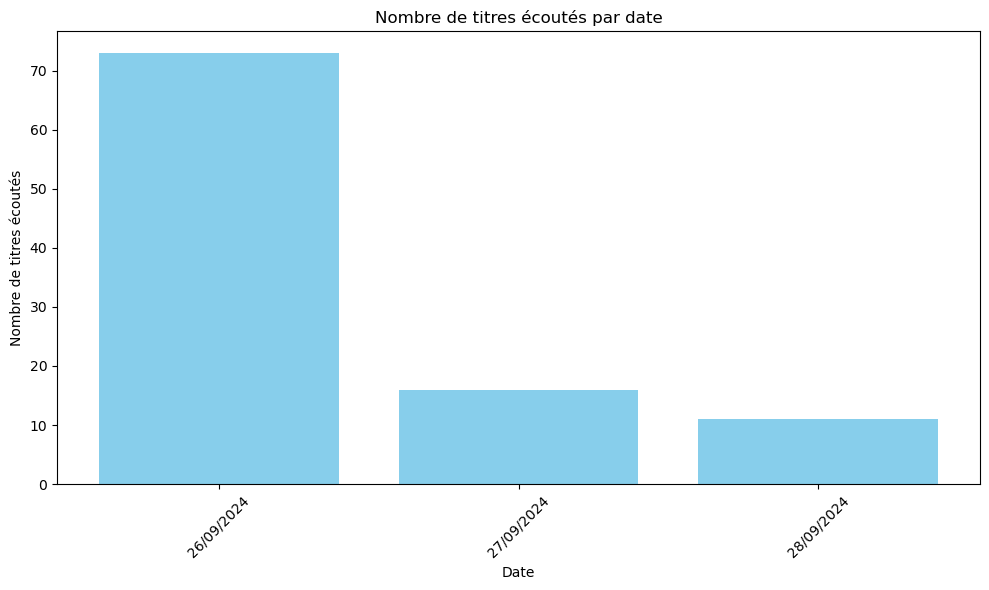

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que 'df' est votre DataFrame contenant les données collectées.

# 1. Convertir 'listen_date' en format datetime
df['listen_date'] = pd.to_datetime(df['listen_date'], format='%d/%m/%Y')

# 2. Grouper par 'listen_date' et compter le nombre de titres
date_counts = df.groupby('listen_date').size().reset_index(name='counts')

# 3. Afficher le DataFrame résultant (optionnel)
print(date_counts)

# 4. Créer la visualisation
plt.figure(figsize=(10, 6))
plt.bar(date_counts['listen_date'].dt.strftime('%d/%m/%Y'), date_counts['counts'], color='skyblue')
plt.xlabel('Date')
plt.ylabel('Nombre de titres écoutés')
plt.title('Nombre de titres écoutés par date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
